### Choose a dataset to Visulaize
* Import needed libraries 
* Load your own dataset

In [387]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime

In [388]:
fifa = pd.read_csv('fifa_eda.csv')

### Descriptive Analysis
* Write the codes for summarizing the dataset (head, tail, shape, describe, info, etc).
* Write your findings of the summarizations (write at least 10 findings).

In [389]:
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [390]:
fifa.tail()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,CM,2017,2019-01-01,5.750000,134.0,143.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,ST,2018,2020-01-01,6.250000,170.0,113.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,2.0,ST,2017,2021-01-01,5.666667,148.0,165.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,RW,2018,2019-01-01,5.833333,154.0,143.0
18206,246269,G. Nugent,16,England,46,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,CM,2018,2019-01-01,5.833333,176.0,165.0


In [391]:
fifa.shape

(18207, 18)

In [392]:
fifa.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [393]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

In [394]:
fifa['Joined']=pd.to_datetime(fifa['Joined'])
fifa['Contract Valid Until']=pd.to_datetime(fifa['Contract Valid Until'])


In [395]:
fifa.describe()

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Contract Valid Until,Height,Weight,Release Clause
count,18207.000000,18207.000000,18207.000000,18207.000000,17955.000000,18207.000000,18159.000000,18159.000000,18207,17918,18207.000000,18207.000000,18207.000000
mean,214298.338606,25.122206,66.238699,71.307299,2444.530214,9.731312,1.113222,2.361308,1970-01-01 00:00:00.000002016,2020-03-08 03:08:17.868065792,5.946771,165.979129,4585.060971
min,16.000000,16.000000,46.000000,48.000000,10.000000,0.000000,1.000000,1.000000,1970-01-01 00:00:00.000001991,2018-01-01 00:00:00,5.083333,110.000000,13.000000
25%,200315.500000,21.000000,62.000000,67.000000,325.000000,1.000000,1.000000,2.000000,1970-01-01 00:00:00.000002016,2019-01-01 00:00:00,5.750000,154.000000,570.000000
50%,221759.000000,25.000000,66.000000,71.000000,700.000000,3.000000,1.000000,2.000000,1970-01-01 00:00:00.000002017,2020-01-01 00:00:00,5.916667,165.000000,1300.000000
75%,236529.500000,28.000000,71.000000,75.000000,2100.000000,9.000000,1.000000,3.000000,1970-01-01 00:00:00.000002018,2021-01-01 00:00:00,6.083333,176.000000,4585.060806
max,246620.000000,45.000000,94.000000,95.000000,118500.000000,565.000000,5.000000,5.000000,1970-01-01 00:00:00.000002018,2026-01-01 00:00:00,6.750000,243.000000,228100.000000
std,29965.244204,4.669943,6.908930,6.136496,5626.715434,21.999290,0.394031,0.756164,NaN,NaN,0.220514,15.572775,10630.414430


##### ***1- The data is for fifa 2019 players***
##### ***2- There is 18207 players***
##### ***3- The mean of age is almost 25***
##### ***4- The mean of overall rating is 66***
##### ***5- data need to clean***
##### ***6- The height is measure in feet***
##### ***7- Weight measure in pound***
##### ***8- Joined should be convert from int64 to Date type***
##### ***9- There is Columns***
##### ***10- The mean of Skills is 2.3***

### Univariate Visualization
* Plot two Charts
* Provide each charts with at least two insights 

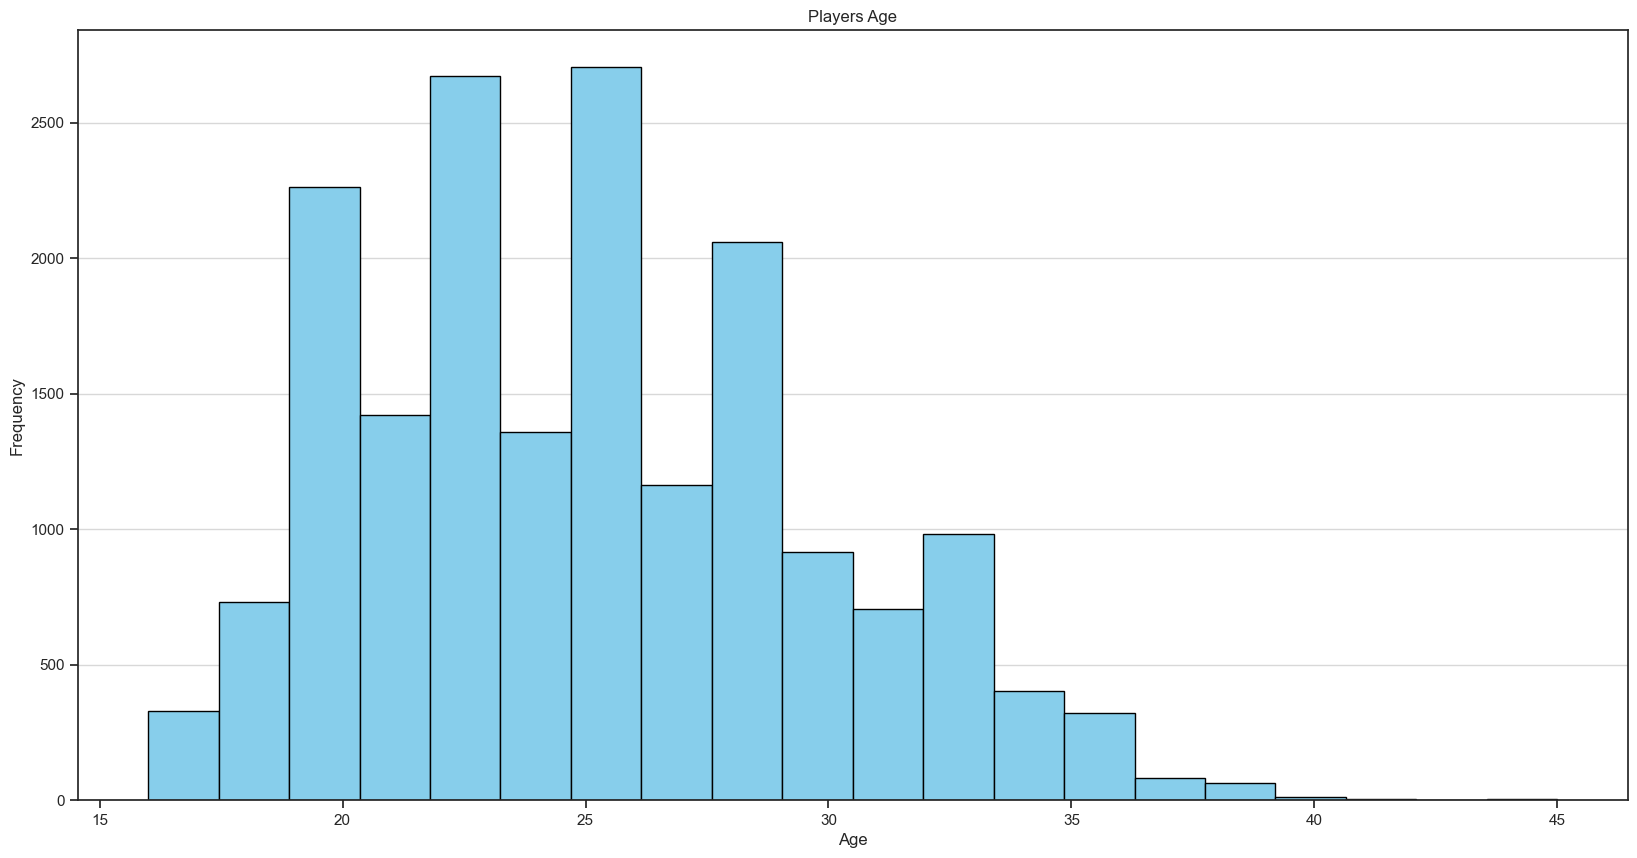

In [396]:
plt.hist(fifa['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Players Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.show()

#### ***mean and median are almost the same for players age***

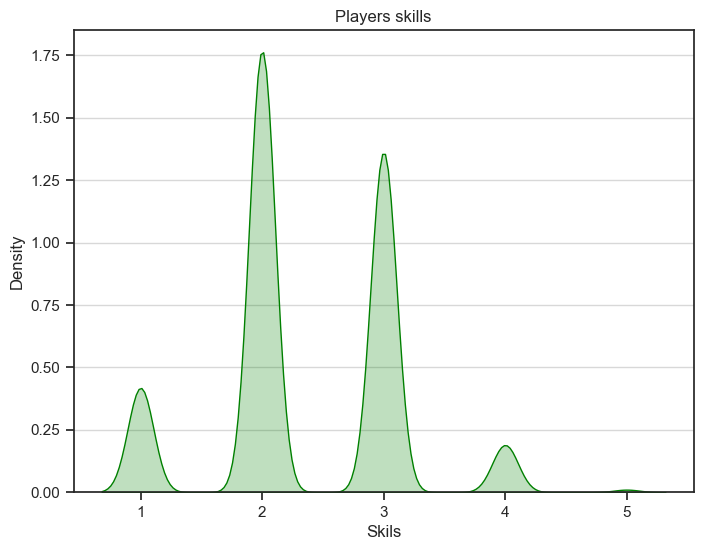

In [397]:
plt.figure(figsize=(8, 6))
sns.kdeplot(fifa['Skill Moves'], color='green', fill=True)
plt.title('Players skills')
plt.xlabel('Skils')
plt.grid(axis='y', alpha=0.75)
plt.show()

#### ***Density of Skills mostly in 2 and 3.***
#### ***5 players skills are very low compared to others***

### Bivariate Visualization 
* Plot two Charts
* Provide each charts with at least two insights 

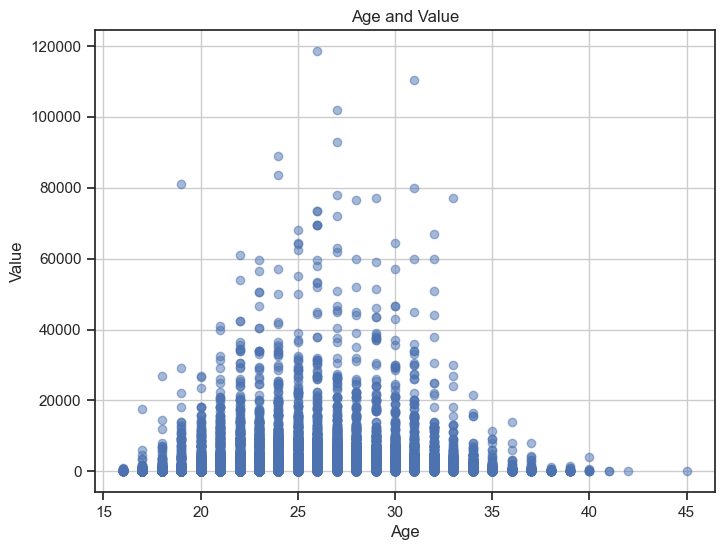

In [398]:
plt.figure(figsize=(8, 6))
plt.scatter(x = fifa['Age'], y = fifa['Value'], alpha=0.5)
plt.title('Age and Value')
plt.xlabel('Age')
plt.ylabel('Value')
plt.grid()
plt.show()

### **There is a bias in the data because of the GOAT Lionel Messi**

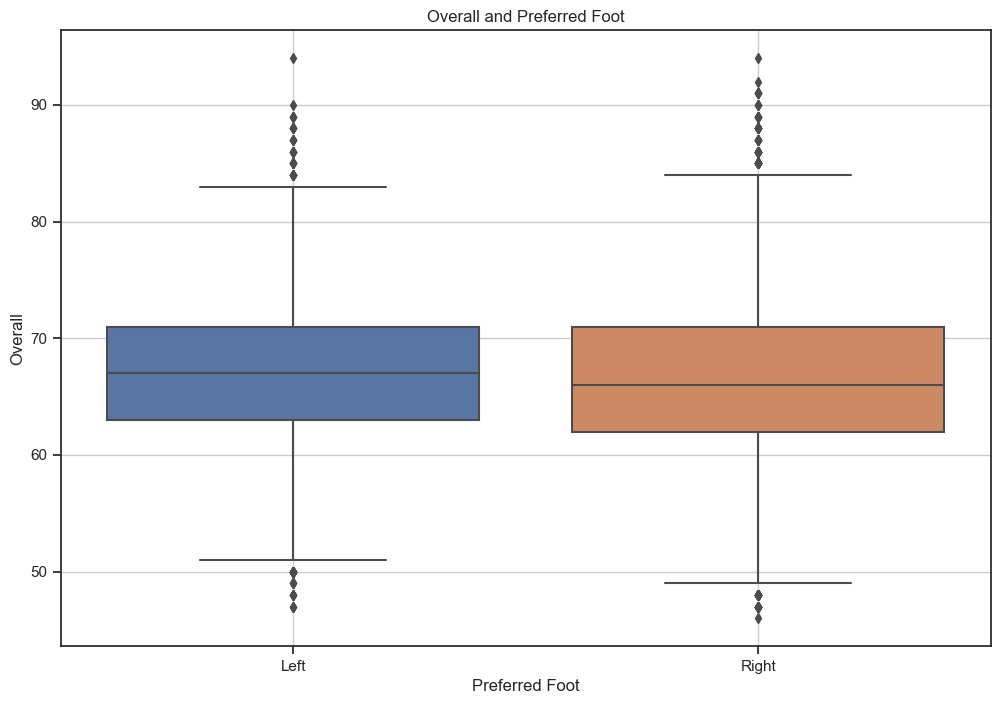

In [399]:
plt.figure(figsize=(12, 8))
sns.boxplot(fifa , y='Overall', x='Preferred Foot')
plt.title('Overall and Preferred Foot')
plt.grid()
plt.show()

#### ***Left foot Player are slightly better overall***

### Multivariate Visualization 
* Plot two Charts
* Provide each charts with at least two insights 

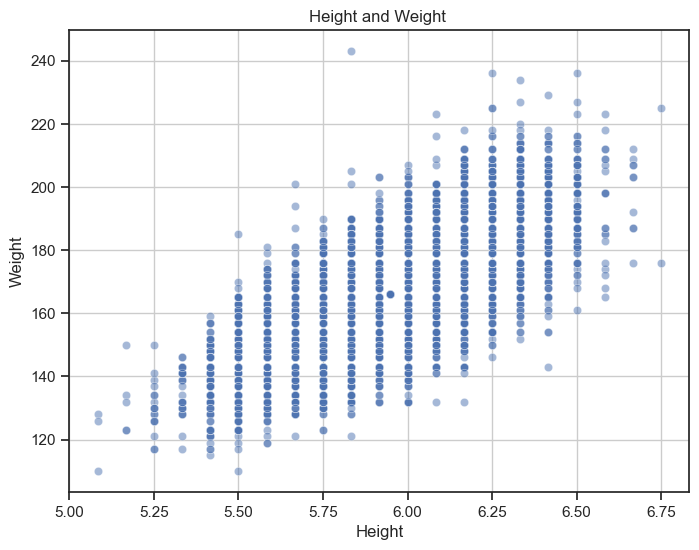

In [400]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data = fifa, x=fifa['Height'], y=fifa['Weight'], alpha=0.5)
plt.title('Height and Weight ')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.grid()
plt.show()

#### ***There is positive corrlation between Height and Weight***

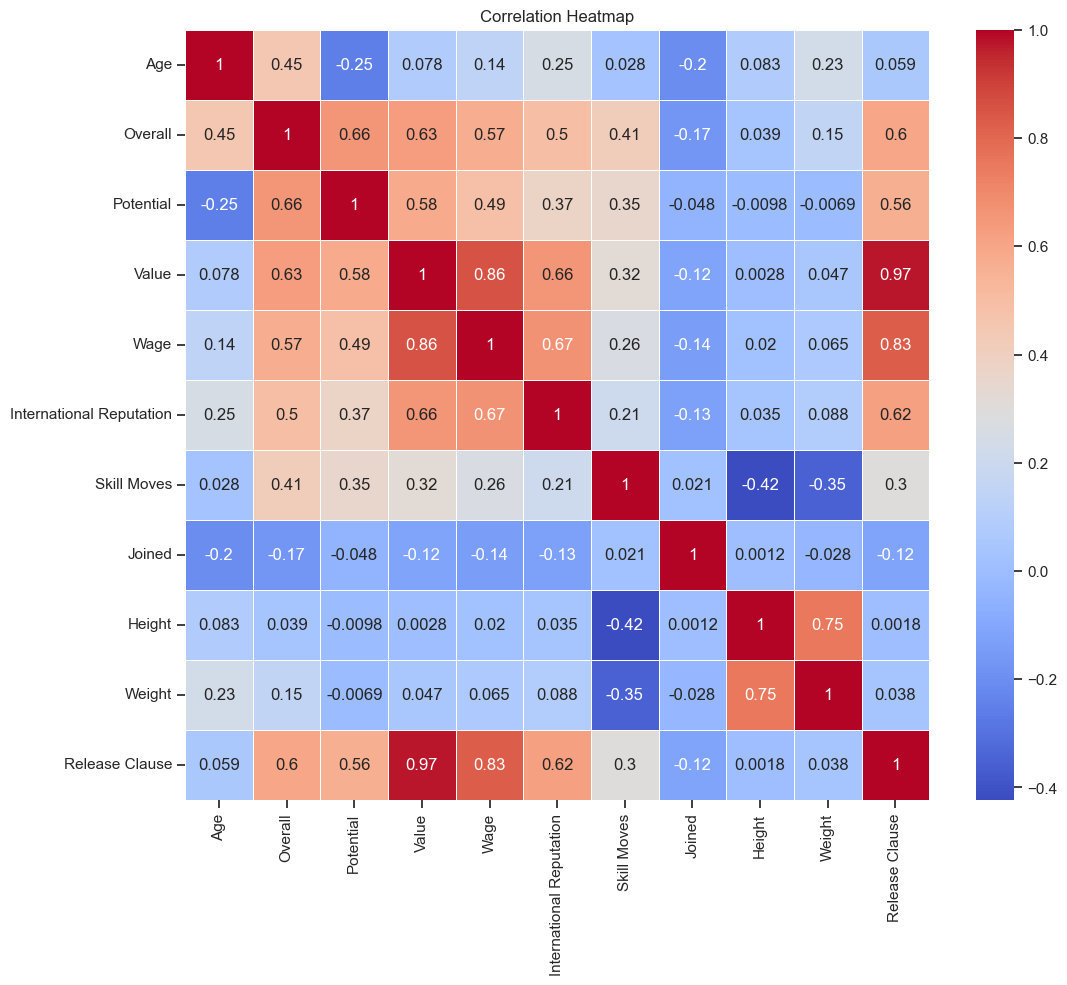

In [401]:
x = fifa[['Age', 'Overall', 'Potential', 'Value', 'Wage', 'International Reputation', 'Skill Moves', 'Joined', 'Height', 'Weight', 'Release Clause']]

x = x.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(x, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### ***There is Strong corrlation between Release Clause and Potential***